In [ ]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [ ]:
#!unzip -uq "/content/mount/MyDrive/sb.zip" -d "/content/mount/MyDrive/mango/dataset"

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from keras_preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

renaming the images and saved in a single folder

In [ ]:
#dir = "/content/mount/MyDrive/fruits/fruits_validation/Tomato not Ripened"
#destination_dir = '/content/mount/MyDrive/fruits/fruits_validation/tomato'
#for count, filename in enumerate(os.listdir(dir)):
  #dst = "tomato9"+str(count)+".jpg"
  #os.rename(os.path.join(dir, filename), os.path.join(destination_dir, dst))

In [ ]:
#! pip install Ysplit-folders

In [ ]:
#import splitfolders
#splitfolders.ratio("/content/mount/MyDrive/mango/dataset/sb", output="/content/mount/MyDrive/mango/mango_dataset", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

Copying files: 1774 files [01:15, 23.63 files/s]


In [ ]:
training_dir = r"/content/mount/MyDrive/mango/mango_dataset/train"
train_gen = training_datagen.flow_from_directory(training_dir, target_size=(100,100), class_mode="categorical", color_mode="grayscale")

Found 1413 images belonging to 15 classes.


In [ ]:
validation_dir = r"/content/mount/MyDrive/mango/mango_dataset/val"
val_gen = validation_datagen.flow_from_directory(validation_dir, target_size=(100,100), class_mode="categorical", color_mode="grayscale")

Found 361 images belonging to 15 classes.


In [ ]:
model = keras.models.Sequential([
      Conv2D(16, (3, 3), input_shape=(100, 100, 1), activation='relu'),
      MaxPooling2D(2,2),
 
      Conv2D(32, (3,3), activation='relu'),
      MaxPooling2D(2,2),
 
      Conv2D(64, (3,3), activation='relu'),
      MaxPooling2D(2,2),
 
      Conv2D(128, (3,3), activation='relu'),
      MaxPooling2D(2,2),
 
      keras.layers.Flatten(),
 
      keras.layers.Dense(512, activation='relu'),
 
      keras.layers.Dense(15, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])
validation_accuracy = 0.98
class myCallBack(keras.callbacks.Callback):
  def on_epcoh_end(self, epoch, logs={}):
    if (logs.get("val_acc") >= validation_accuracy):
      print("\nReached desired validation accuracy, so terminating training")
      self.model.stop_training=True
callbacks = myCallBack()

In [ ]:
mango_model = model.fit(train_gen, epochs=30, validation_data=val_gen, verbose=1, callbacks=[callbacks], workers=10)
filepath = r"/content/mount/MyDrive/mango/saved_model"
keras.models.save_model(
    model,
    filepath,
    overwrite = True,
    include_optimizer = True,
    save_format = "tf",
    signatures = None
)

Epoch 1/30
45/45 [==============================] - 451s 9s/step - loss: 2.4792 - accuracy: 0.1812 - precision: 1.0000 - recall: 0.0042 - val_loss: 2.1049 - val_accuracy: 0.3546 - val_precision: 1.0000 - val_recall: 0.0194
Epoch 2/30
45/45 [==============================] - 366s 7s/step - loss: 1.9231 - accuracy: 0.3503 - precision: 0.6578 - recall: 0.1047 - val_loss: 2.2902 - val_accuracy: 0.2687 - val_precision: 0.2954 - val_recall: 0.1939
Epoch 3/30
45/45 [==============================] - 366s 7s/step - loss: 1.4467 - accuracy: 0.5152 - precision: 0.7070 - recall: 0.3022 - val_loss: 1.2728 - val_accuracy: 0.5457 - val_precision: 0.6912 - val_recall: 0.3906
Epoch 4/30
45/45 [==============================] - 341s 7s/step - loss: 1.0864 - accuracy: 0.6362 - precision: 0.7560 - recall: 0.4869 - val_loss: 0.9957 - val_accuracy: 0.7036 - val_precision: 0.8252 - val_recall: 0.5623
Epoch 5/30
45/45 [==============================] - 346s 7s/step - loss: 0.8340 - accuracy: 0.7254 - precisi

INFO:tensorflow:Assets written to: /content/mount/MyDrive/mango/saved_model/assets


INFO:tensorflow:Assets written to: /content/mount/MyDrive/mango/saved_model/assets


<Figure size 432x288 with 0 Axes>

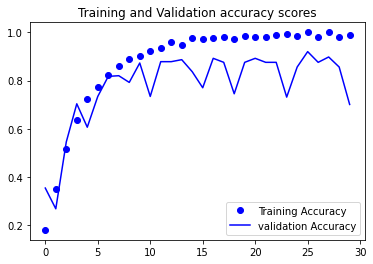

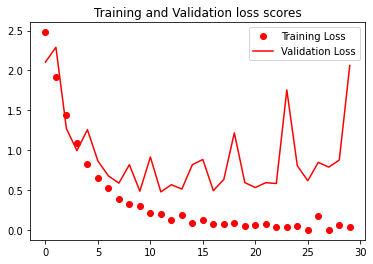

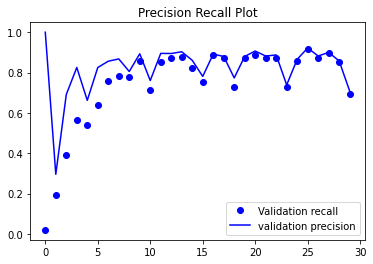

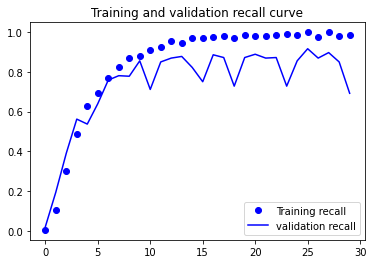

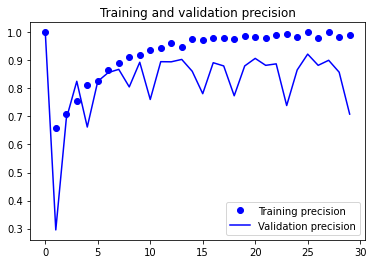

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = mango_model.history['accuracy']
val_acc = mango_model.history['val_accuracy']
loss = mango_model.history['loss']
val_loss = mango_model.history['val_loss']
recall = mango_model.history['recall']
val_recall = mango_model.history['val_recall']
precision = mango_model.history['precision']
val_precision = mango_model.history['val_precision']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='validation Accuracy')
plt.title('Training and Validation accuracy scores')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss scores')
plt.legend()
plt.figure()
 
plt.plot(epochs, val_recall, 'bo', label='Validation recall')
plt.plot(epochs, val_precision, 'b', label='validation precision')
plt.title('Precision Recall Plot')
plt.legend()
plt.figure()
 
plt.plot(epochs, recall, 'bo', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='validation recall')
plt.title('Training and validation recall curve')
plt.legend()
plt.figure()
 
plt.plot(epochs, precision, 'bo', label='Training precision')
plt.plot(epochs, val_precision, 'b', label='Validation precision')
plt.title('Training and validation precision')
plt.legend()
plt.figure()

In [ ]:
model_dir = r"/content/mount/MyDrive/mango/saved_model"

mango_model_v2 = keras.models.load_model(
    model_dir,
    custom_objects = None,
    compile = True
)

In [ ]:
def fruit_prediction(image_dir):
  img_list = os.listdir(image_dir)
  for fruits in img_list:
    path = os.path.join(image_dir, fruits)
    img = image.load_img(path, target_size=(100,100), color_mode='grayscale')
    array = image.img_to_array(img)
    x = np.expand_dims(array, axis=0)

    vimage = np.vstack([x])
    img_classification = mango_model_v2.predict(vimage)
    print(img_classification, fruits)

In [ ]:
fruit_prediction(r"/content/mount/MyDrive/mango/mango_dataset/test")

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Khirsapat.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] khirshapat diseases.JPG
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Langra.JPG
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] Langra diseases.JPG
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Harivanga.JPG
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] asina packet.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] jhinai.JPG
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] Bari4.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] bari4 dis 2.JPG
[[0.000000e+00 0.000000e+00 0.000000e+00 1.000000e+00 0.000000e+00
  0.000000e+00 8.888314e-09 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00]] Bari4 dis.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] asina packet dis.JPG
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] asina dis.JPG
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] katimon dis.JPG
[[0. 0.